In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# 防止中文乱码，仿宋体
font = 'SourceHanSerif-VF.ttf'
plt.rcParams['font.family'] = ['Arial Unicode MS']

In [2]:
color = ['#AF41F0', '#FA73B2', '#F9CEEB', '#734434', '#BF846F', '#D9B4A7']

### B站

In [3]:
# 读区xlsx文件，只取I，K列
df = pd.read_excel('processed_data/CPR视频打标统计.xlsx', sheet_name='B站-CPR', usecols='I:K')
df.head(4)

,视频发布者（1：医学机构；2：医学专业背景的个人；3：账号简介中没有提及医学专业背景的个人账号；4: 非医学机构；）,视频中被救助者是人类时，其性征（1：男性；2：女性）,视频中被救助者是假人时，性征为（1：男性；2：女性；3.无性别特征的3D透视模型，或用其他物品替代）
0,2.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,2.0,NaN,3.0


In [245]:
# 定义一个函数，用于删除列名中的括号及括号内的内容
def remove_brackets(column_name):
    return re.sub(r'\（[^)]*\）', '', column_name)

In [246]:
# 删除3列都为空的行
df.dropna(how='all', inplace=True)
# 将每列的列名中的（）包括里面的内容去掉
df.columns = df.columns.map(remove_brackets)
df.reset_index(drop=True, inplace=True)
df.head(3)

,视频发布者,视频中被救助者是人类时，其性征,视频中被救助者是假人时，性征为
0,2.0,1.0,1.0
1,2.0,NaN,3.0
2,2.0,NaN,1.0


#### 1、视频发布者 (pie)

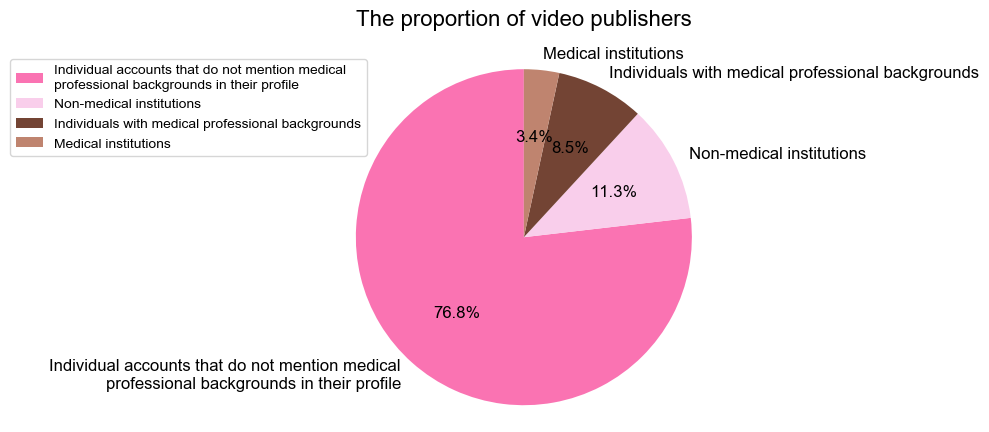

In [247]:
# 将数字分类替换为描述性文本
category_mapping = {
    1: "Medical institutions",
    2: "Individuals with medical professional backgrounds",
    3: "Individual accounts that do not mention medical\nprofessional backgrounds in their profile",
    4: "Non-medical institutions"
}
df['视频发布者'] = df['视频发布者'].replace(category_mapping)

# 计算每个视频发布者的数量
publisher_counts = df['视频发布者'].value_counts()

# 计算每个视频发布者的占比
publisher_percentage = publisher_counts / len(df)

# 创建一个饼图
fig, ax = plt.subplots()
ax.pie(publisher_percentage, colors=color[1:5], labels=publisher_percentage.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# 设置标题和轴标签
ax.set_title("The proportion of video publishers", y=1.05, fontsize=16)
ax.axis('equal')  
ax.legend(loc='upper left', bbox_to_anchor=(-0.55, 1.0), fontsize=10)

# 显示图形
plt.show()

#### 2、视频中的假人是男、女、无性别 （bar）

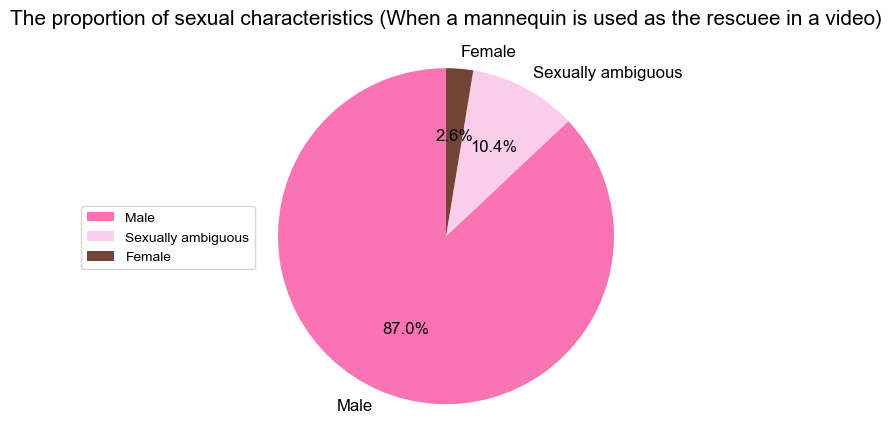

In [248]:
# 将数字分类替换为描述性文本
gender_mapping = {
    1: "Male",
    2: "Female",
    3: "Sexually ambiguous"
}
df['视频中被救助者是假人时，性征为'] = df['视频中被救助者是假人时，性征为'].replace(gender_mapping)

# 计算每个性别类别的数量
gender_counts = df['视频中被救助者是假人时，性征为'].value_counts()

# 计算每个性别类别的占比
gender_percentage = gender_counts / len(df)

# 创建一个饼图
fig, ax = plt.subplots()
ax.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=color[1:4])

# 设置标题和轴标签
ax.set_title("The proportion of sexual characteristics (When a mannequin is used as the rescuee in a video)", y=1.05, fontsize=15)
ax.axis('equal')  # 确保饼图是圆形的
ax.legend(loc='upper left', bbox_to_anchor=(-0.25, 0.6), fontsize=10)

# 显示图形
plt.show()

### 淘宝

#### 1、广告宣传图（男性 男女都有）（柱状）

In [249]:
df = pd.read_excel('processed_data/taobao.xlsx', sheet_name='in', usecols='E:F')
df.head(4)

,商家广告宣传图片假人性征（1：只有男性；\n2：男女都有）,售卖假人的性征（1：只有男性；2：男女都有，但女性假人没有女性胸部性征；\n3：男女都有，女性假人有女性胸部性征；\n4：男女都有，但展示页和商品说明中不知是否有女性胸部性征）
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0


In [250]:
df.dropna(how='all', inplace=True)
df.columns = df.columns.map(remove_brackets)
df.reset_index(drop=True, inplace=True)

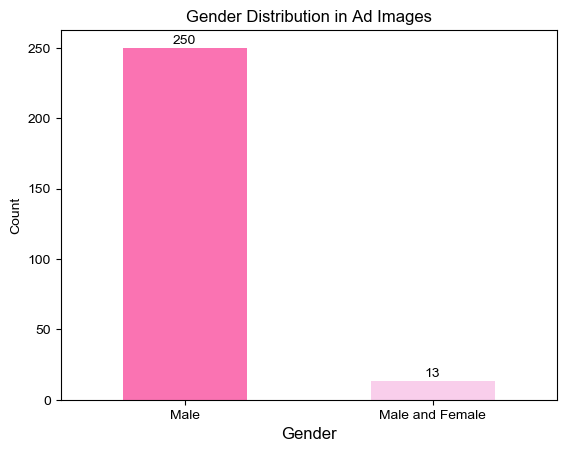

In [251]:
# 将数字分类替换为描述性文本
gender_mapping = {
    1: "Male",
    2: "Male and Female"
}
df['商家广告宣传图片假人性征'] = df['商家广告宣传图片假人性征'].replace(gender_mapping)

# 计算每个性别类别的数量
gender_counts = df['商家广告宣传图片假人性征'].value_counts()

# 计算每个性别类别的占比
gender_percentage = gender_counts / len(df)

# 创建柱状图
fig, ax = plt.subplots()
bars = gender_counts.plot(kind='bar', ax=ax, color=color[1:3])

# 设置标题、轴标签和图例
ax.set_title("Gender Distribution in Ad Images")
ax.set_xlabel("Gender", fontsize=12,)
plt.xticks(rotation=0)
ax.set_ylabel("Count")

# 在每个柱子上方添加文本
for bar in bars.patches:
    ax.annotate(f'{bar.get_height()}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 1),  # 设置文本与柱子上方的距离
                textcoords='offset points',
                ha='center', va='bottom')

# 显示图形
plt.show()

#### 2、售卖假人的性征（柱状）

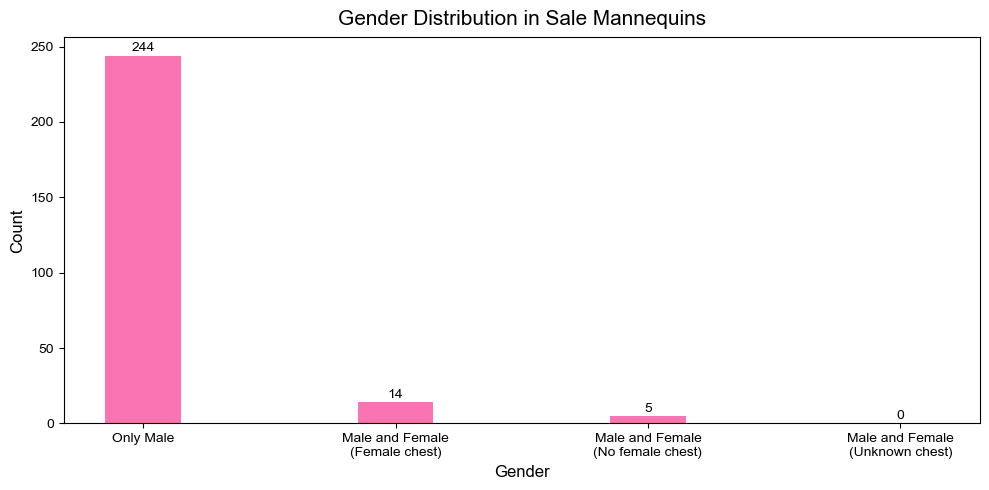

In [252]:
# 将数字分类替换为描述性文本
gender_mapping = {
    1: "Only Male",
    2: "Male and Female\n(No female chest)",
    3: "Male and Female\n(Female chest)",
    4: "Male and Female\n(Unknown chest)"
}
df['售卖假人的性征'] = df['售卖假人的性征'].replace(gender_mapping)

# 计算每个性别类别的数量
gender_counts_sale = df['售卖假人的性征'].value_counts()

# 添加未在数据中出现的类别，数量为0
for category in gender_mapping.values():
    if category not in gender_counts_sale.index:
        gender_counts_sale[category] = 0

# 按照类别顺序对结果进行排序
gender_counts_sale = gender_counts_sale.sort_values(ascending=False)

# 创建柱状图，并调整图形大小，设置颜色
_, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(gender_counts_sale.index, gender_counts_sale.values, color=color[1], width=0.3)

# 设置标题、轴标签
ax.set_title("Gender Distribution in Sale Mannequins", y=1.01, fontsize=15)
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
# 设置x轴的刻度和标签
ax.set_xticks(range(len(gender_counts_sale.index)))
ax.set_xticklabels(gender_counts_sale.index, rotation=0, wrap=True)

# 在每个柱子上方添加文本
for bar in bars:
    ax.annotate(f'{bar.get_height()}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 1),  # 设置文本与柱子上方的距离
                textcoords='offset points',
                ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.show()


### 微博+知乎

#### 1、词云图、每个原因的个数 做bar

In [253]:
zhihu_df1 = pd.read_excel('processed_data/zhihu_topic_1.xlsx', sheet_name='在这里打标了', usecols='C:D')
zhihu_df2 = pd.read_excel('processed_data/zhihu_topic_2.xlsx', sheet_name='打标', usecols='B:D')
weibo_df = pd.read_excel('processed_data/weibo1.xlsx', sheet_name='in', usecols='A:D')

In [254]:
# 预处理数据
weibo_df = weibo_df[weibo_df['没用打1'] != 1]
zhihu_df1.dropna(subset=['类型'], inplace=True)
weibo_df = weibo_df.iloc[:, 2:4]
zhihu_df2 = zhihu_df2.iloc[:, 1:3]
df = pd.concat([zhihu_df1, zhihu_df2, weibo_df], ignore_index=True)

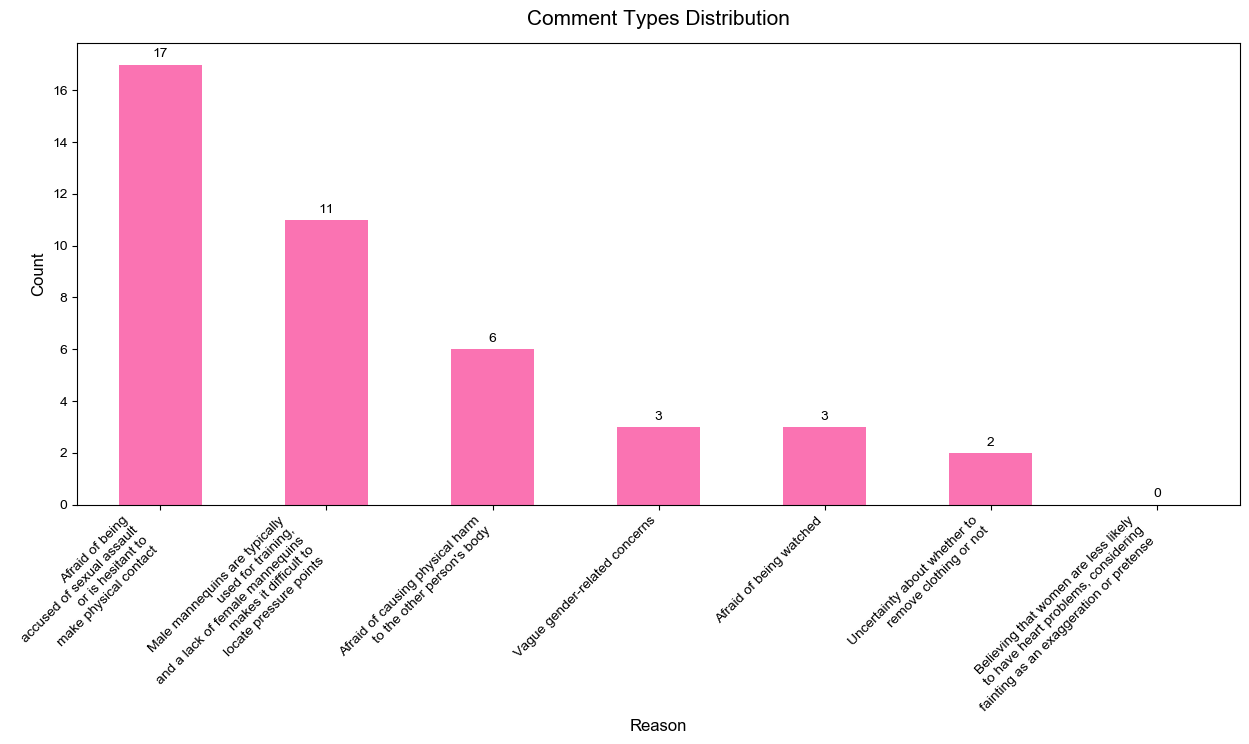

In [255]:
# 类型映射
category_mapping = {
    1: "Afraid of being\naccused of sexual assault\nor is hesitant to\nmake physical contact",
    2: "Afraid of causing physical harm\nto the other person's body",
    3: "Believing that women are less likely\n to have heart problems, considering\nfainting as an exaggeration or pretense",
    4: "Uncertainty about whether to\nremove clothing or not",
    5: "Male mannequins are typically\nused for training,\nand a lack of female mannequins\nmakes it difficult to\nlocate pressure points",
    6: "Vague gender-related concerns",
    7: "Afraid of being watched"
}

# 计算每个类型的数量
type_counts = df['类型'].value_counts()

# 计数为0的也显示
for category in category_mapping.keys():
    if category not in type_counts.index:
        type_counts.loc[category] = 0

# 按照类别顺序对结果进行排序
type_counts = type_counts.sort_values(ascending=False)

# 创建柱状图
fig, ax = plt.subplots(figsize=(15, 6))
bars = type_counts.plot(kind='bar', ax=ax, color=color[1])

# 设置标题、轴标签
ax.set_title("Comment Types Distribution", y=1.02, fontsize=15)
ax.set_xlabel("Reason", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(range(len(category_mapping))) 
ax.set_xticklabels([category_mapping[i] for i in type_counts.index], rotation=45, ha="right")

# 在每个柱子上方添加文本
for bar in bars.patches:
    ax.annotate(f'{bar.get_height()}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 设置文本与柱子上方的距离
                textcoords='offset points',
                ha='center', va='bottom')

# 显示图形
plt.show()

In [256]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(color)

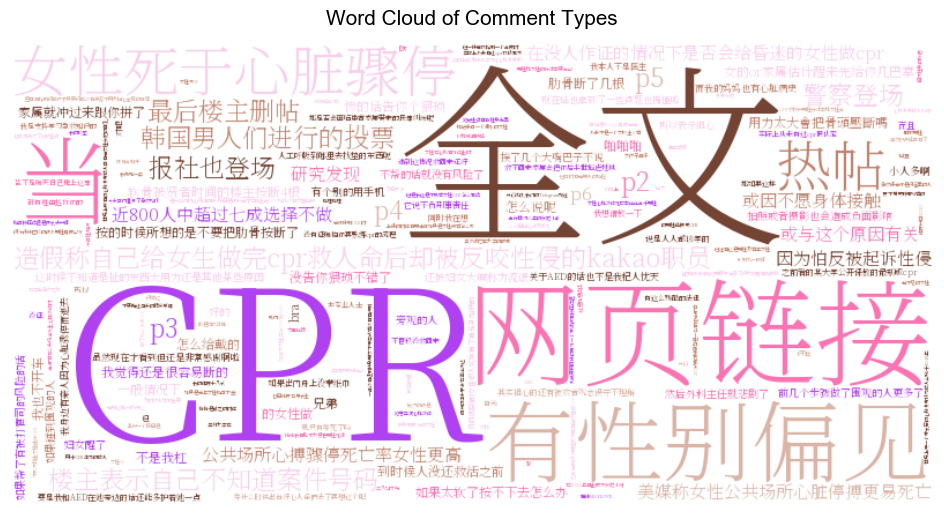

In [257]:
# 创建词云
text = ' '.join(df['评论'].astype(str))
wordcloud = WordCloud(font_path = font, width=800, height=400, background_color='white', color_func=custom_color_func).generate(text)

# 显示词云
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comment Types', fontsize=15, y=1.02)
plt.show()